,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


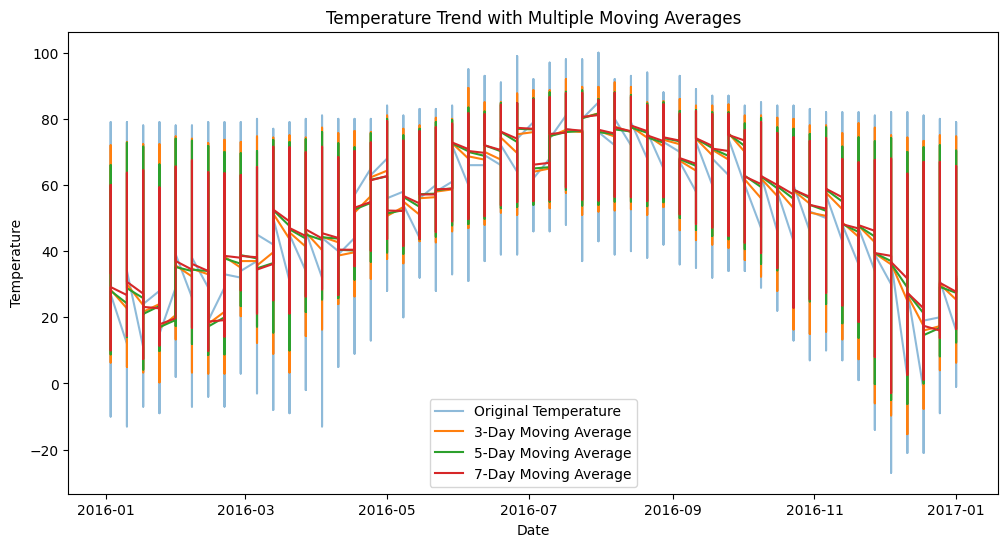

,Date.Full,Data.Temperature.Avg Temp,Temperature_Smoothed_3,Temperature_Smoothed_5,Temperature_Smoothed_7
0,2016-01-03,39,NaN,NaN,NaN
214,2016-01-03,20,NaN,NaN,NaN
213,2016-01-03,20,26.333333,NaN,NaN
212,2016-01-03,21,20.333333,NaN,NaN
211,2016-01-03,48,29.666667,29.6,NaN
210,2016-01-03,43,37.333333,30.4,NaN
209,2016-01-03,43,44.666667,35.0,33.428571
208,2016-01-03,41,42.333333,39.2,33.714286
207,2016-01-03,43,42.333333,43.6,37.000000
206,2016-01-03,50,44.666667,44.0,41.285714


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/weather.csv"
df = pd.read_csv(file_path)

# Display first few rows to understand the structure
display(df.head())

# Assuming 'Temperature' is a column in the dataset (modify if needed)
if 'Data.Temperature.Avg Temp' in df.columns:
    df['Date.Full'] = pd.to_datetime(df['Date.Full'])  # Ensure Date column is in datetime format
    df = df.sort_values(by='Date.Full')  # Sort by date

    # Apply moving average smoothing with multiple window sizes
    window_sizes = [3, 5, 7]  # Different levels of smoothing
    for window in window_sizes:
        df[f'Temperature_Smoothed_{window}'] = df['Data.Temperature.Avg Temp'].rolling(window=window).mean()

    # Plot original and smoothed temperature
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date.Full'], df['Data.Temperature.Avg Temp'], label='Original Temperature', alpha=0.5)
    for window in window_sizes:
        plt.plot(df['Date.Full'], df[f'Temperature_Smoothed_{window}'], label=f'{window}-Day Moving Average')

    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Temperature Trend with Multiple Moving Averages')
    plt.legend()
    plt.show()

    # Display the dataset with new columns
    display(df[['Date.Full', 'Data.Temperature.Avg Temp'] + [f'Temperature_Smoothed_{w}' for w in window_sizes]].head(10))
else:
    print("Column 'Data.Temperature.Avg Temp' not found in dataset. Please check column names.")